In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
from matplotlib import ticker, cm
import mpl_toolkits.axes_grid1 as ag
import pandas as pd
from sklearn.metrics import r2_score
import sys
%matplotlib inline

In [99]:
def zscore(X,flag):
    #flag=1 for ones vector
    ini=0
    if flag: 
        X = np.c_[np.ones((len(X),1)),X]
        ini=1
    nf,nc=X.shape
    for it in range(ini,nc):
        m=np.mean(X[:,it])
        std=np.std(X[:,it])
        X[:,it]=(X[:,it]-m)/std
        
    return X   

Text(0, 0.5, 'poverty rate')

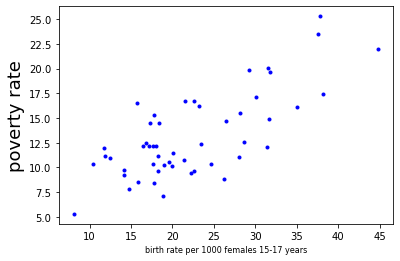

In [100]:
df = pd.read_csv('poverty.csv')
X = df[['Brth15to17']]
X = X.to_numpy()
y = df['PovPct']
y = y.to_numpy()
plt.plot(X,y,'b.')
plt.xlabel("birth rate per 1000 females 15-17 years", fontsize=8)
plt.ylabel("poverty rate", rotation=90, fontsize=18)

#multivariable 
# X = df[['Brth15to17', 'Brth18to19']]
# X = X.to_numpy()
# y = df['PovPct']
# y = y.to_numpy()
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:,0], X[:,1], y, c='r', marker='o')
# ax.set_xlabel(' birth rate per 1000 females 15-17 years',fontsize=8)
# ax.set_ylabel(' birth rate per 1000 females 18-19 years',fontsize=8)
# ax.set_zlabel('poverty rate',fontsize=12)


(51, 2)
theta_0=12.409043 theta_1= 2.916834


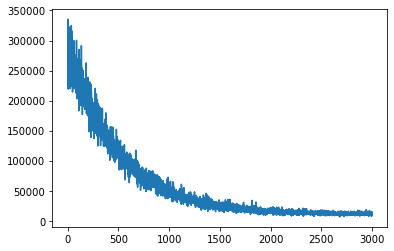

In [102]:
X = df[['Brth15to17']]
X = X.to_numpy()
y = df['PovPct']
y = y.to_numpy()
X=zscore(X,1)
MB=1
N=len(y)
theta = np.random.randn(2,1)
ep=1e-6
lr =1e-3
n_iter =3000
j_cost= np.zeros([n_iter])
y=y.reshape((len(y), 1))
print(X.shape)
cost =0.0
j_cost= np.zeros([n_iter])
for it in range(n_iter):
    #Gradient
    cost =0.0
    for i in range(N):
        rand_ind = np.random.randint(0,N,MB)
        X_i = X[rand_ind,:].reshape(MB,X.shape[1])
        y_i = y[rand_ind].reshape(MB,1)
        pred = np.dot(X_i,theta)
        h=pred - y_i
        theta = theta -(1/N)*lr*( X_i.T.dot((h)))
        cost +=(1/2*N)*np.sum(np.square(h))
    j_cost[it]=cost

    
print("theta_0=%f theta_1= %f" %(theta[0],theta[1]) )
fig = plt.figure()
plt.plot(j_cost)
plt.show()

# theta_0=12.894598 theta_1= 3.023298
# theta_0=13.098372 theta_1= 3.095889

-1.7807515947356547


Text(0, 0.5, '$y$')

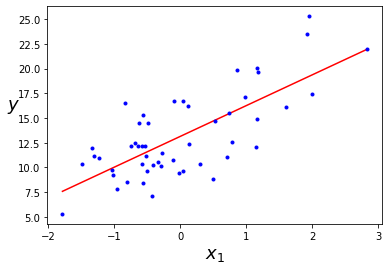

In [43]:
mini=np.min(X[:,1])
maxi=np.max(X[:,1])
print(mini)
X_new = np.array([[mini],[maxi]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta)
plt.plot(X_new,y_predict,'r-')
plt.plot(X[:,1],y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)


In [57]:
%matplotlib qt
theta_0=np.linspace(-10,50,1000)
theta_1=np.linspace(-6,6,1000)
error=np.zeros((len(theta_0),len(theta_1)))
print(error.shape)
for i in range (len(theta_0)):
    for j in range (len(theta_1)):
        theta_t=[theta_0[i],theta_1[j]]
        pred = np.dot(X,theta_t)
        h=(pred - y)
        error[i,j]=np.sum(np.square(h))
tx, ty = np.meshgrid(theta_0, theta_1)  

(1000, 1000)


In [97]:
mini=np.round(np.min(error))
maxi=np.round(np.max(error))
levels = np.logspace(-10, 1, 40, endpoint=True)
levels=(levels/10)*(maxi-mini)+mini
# levels = np.logspace(mini, maxi, 30, endpoint=True)
           
fig = plt.figure();
h = plt.contour(tx, ty,  error, levels=levels)
# levels=[1e-3, 1e-2, 1e-1, 1e0]
# ax.clabel(h, inline=True, fontsize=10, manual=levels)
plt.colorbar()
plt.plot(44,-5.18,'ro')
X = df[['Brth15to17']]
X = X.to_numpy()
y = df['PovPct']
y = y.to_numpy()
X=zscore(X,1)
MB=1
N=len(y)
theta = np.array([44,-5.18]).reshape(2,1)
ep=1e-6
lr =1e-3
n_iter =1000
j_cost= np.zeros([n_iter])
y=y.reshape((len(y), 1))
cost =0.0
j_cost= np.zeros([n_iter])
theta_p=theta
for it in range(n_iter):
    #Gradient
    cost =0.0
    for i in range(N):
        rand_ind = np.random.randint(0,N,MB)
        X_i = X[rand_ind,:].reshape(MB,X.shape[1])
        y_i = y[rand_ind].reshape(MB,1)
        pred = np.dot(X_i,theta)
        h=pred - y_i
        theta = theta -(1/N)*lr*( X_i.T.dot((h)))
        cost +=(1/2*N)*np.sum(np.square(h))
    j_cost[it]=cost
    plt.plot([theta_p[0],theta[0]],[theta_p[1],theta[1]],'r-')
    
plt.show()




# figg = plt.figure();
# ax = figg.gca(projection='3d');
# ax.plot_surface(tx, ty,  error, cmap=cm.coolwarm,linewidth=0, antialiased=False);
# plt.show()